# Data Science & Business Analytics Intern at The Sparks Foundation - GRIP APRIL'21 Batch
### Author: Sumit Mishra

##  TASK 4: Exploratory Data Analysis - Terrorism

### Perform ‘Exploratory Data Analysis’ on dataset ‘Global Terrorism’
● As a security/defense analyst, try to find out the hot zone of terrorism.<br>
● What all security issues and insights you can derive by EDA? 

### 1. Importing the required header files 

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

### 2. Reading the data

In [ ]:
#Dataset: https://bit.ly/34SRn3b

#Reading the csv file using pandas library
data = pd.read_csv('globalterrorismdb_0718dist.csv',encoding='ISO-8859-1')
#Printing shape of data
print(data.shape)
#Displaying 5 records
data.head()

(181691, 135)


,eventid,iyear,imonth,iday,approxdate,extended,resolution,country,country_txt,region,region_txt,provstate,city,latitude,longitude,specificity,vicinity,location,summary,crit1,crit2,crit3,doubtterr,alternative,alternative_txt,multiple,success,suicide,attacktype1,attacktype1_txt,attacktype2,attacktype2_txt,attacktype3,attacktype3_txt,targtype1,targtype1_txt,targsubtype1,targsubtype1_txt,corp1,target1,...,weapsubtype4,weapsubtype4_txt,weapdetail,nkill,nkillus,nkillter,nwound,nwoundus,nwoundte,property,propextent,propextent_txt,propvalue,propcomment,ishostkid,nhostkid,nhostkidus,nhours,ndays,divert,kidhijcountry,ransom,ransomamt,ransomamtus,ransompaid,ransompaidus,ransomnote,hostkidoutcome,hostkidoutcome_txt,nreleased,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related
0,197000000001,1970,7,2,NaN,0,NaN,58,Dominican Republic,2,Central America & Caribbean,NaN,Santo Domingo,18.456792,-69.951164,1.0,0,NaN,NaN,1,1,1,0.0,NaN,NaN,0.0,1,0,1,Assassination,NaN,NaN,NaN,NaN,14,Private Citizens & Property,68.0,Named Civilian,NaN,Julio Guzman,...,NaN,NaN,NaN,1.0,NaN,NaN,0.0,NaN,NaN,0,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PGIS,0,0,0,0,NaN
1,197000000002,1970,0,0,NaN,0,NaN,130,Mexico,1,North America,Federal,Mexico city,19.371887,-99.086624,1.0,0,NaN,NaN,1,1,1,0.0,NaN,NaN,0.0,1,0,6,Hostage Taking (Kidnapping),NaN,NaN,NaN,NaN,7,Government (Diplomatic),45.0,"Diplomatic Personnel (outside of embassy, cons...",Belgian Ambassador Daughter,"Nadine Chaval, daughter",...,NaN,NaN,NaN,0.0,NaN,NaN,0.0,NaN,NaN,0,NaN,NaN,NaN,NaN,1.0,1.0,0.0,NaN,NaN,NaN,Mexico,1.0,800000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PGIS,0,1,1,1,NaN
2,197001000001,1970,1,0,NaN,0,NaN,160,Philippines,5,Southeast Asia,Tarlac,Unknown,15.478598,120.599741,4.0,0,NaN,NaN,1,1,1,0.0,NaN,NaN,0.0,1,0,1,Assassination,NaN,NaN,NaN,NaN,10,Journalists & Media,54.0,Radio Journalist/Staff/Facility,Voice of America,Employee,...,NaN,NaN,NaN,1.0,NaN,NaN,0.0,NaN,NaN,0,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
3,197001000002,1970,1,0,NaN,0,NaN,78,Greece,8,Western Europe,Attica,Athens,37.997490,23.762728,1.0,0,NaN,NaN,1,1,1,0.0,NaN,NaN,0.0,1,0,3,Bombing/Explosion,NaN,NaN,NaN,NaN,7,Government (Diplomatic),46.0,Embassy/Consulate,NaN,U.S. Embassy,...,NaN,NaN,Explosive,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
4,197001000003,1970,1,0,NaN,0,NaN,101,Japan,4,East Asia,Fukouka,Fukouka,33.580412,130.396361,1.0,0,NaN,NaN,1,1,1,-9.0,NaN,NaN,0.0,1,0,7,Facility/Infrastructure Attack,NaN,NaN,NaN,NaN,7,Government (Diplomatic),46.0,Embassy/Consulate,NaN,U.S. Consulate,...,NaN,NaN,Incendiary,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN


* There are total of 181691 records and 135 features in our dataset.

In [ ]:
#Basic info about the data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 181691 entries, 0 to 181690
Columns: 135 entries, eventid to related
dtypes: float64(55), int64(22), object(58)
memory usage: 187.1+ MB


In [ ]:
#Choosing only required & necessary columns for eda
col_req = {'iyear':'Year','imonth':'Month','iday':'Day','extended':'Extended','iday':'Day','country_txt':'Country', 'provstate':'State',
           'region_txt':'Region','attacktype1_txt':'AttackType','target1':'Target','nkill':'Killed','nwound':'Wounded','success':'Success',
           'suicide':'Suicide','gname':'Group','targtype1_txt':'Target_type','weaptype1_txt':'Weapon_type','motive':'Motive',
           'city':'City','latitude':'Latitude','longitude':'Longitude'}

#Picking only required & necessary columns for EDA
data = data[list(col_req.keys())]

#Renaming columns for ease of analysis
data.rename(columns = col_req, inplace=True)

print(data.shape)
data.head()

(181691, 20)


,Year,Month,Day,Extended,Country,State,Region,AttackType,Target,Killed,Wounded,Success,Suicide,Group,Target_type,Weapon_type,Motive,City,Latitude,Longitude
0,1970,7,2,0,Dominican Republic,NaN,Central America & Caribbean,Assassination,Julio Guzman,1.0,0.0,1,0,MANO-D,Private Citizens & Property,Unknown,NaN,Santo Domingo,18.456792,-69.951164
1,1970,0,0,0,Mexico,Federal,North America,Hostage Taking (Kidnapping),"Nadine Chaval, daughter",0.0,0.0,1,0,23rd of September Communist League,Government (Diplomatic),Unknown,NaN,Mexico city,19.371887,-99.086624
2,1970,1,0,0,Philippines,Tarlac,Southeast Asia,Assassination,Employee,1.0,0.0,1,0,Unknown,Journalists & Media,Unknown,NaN,Unknown,15.478598,120.599741
3,1970,1,0,0,Greece,Attica,Western Europe,Bombing/Explosion,U.S. Embassy,NaN,NaN,1,0,Unknown,Government (Diplomatic),Explosives,NaN,Athens,37.997490,23.762728
4,1970,1,0,0,Japan,Fukouka,East Asia,Facility/Infrastructure Attack,U.S. Consulate,NaN,NaN,1,0,Unknown,Government (Diplomatic),Incendiary,NaN,Fukouka,33.580412,130.396361


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 181691 entries, 0 to 181690
Data columns (total 20 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   Year         181691 non-null  int64  
 1   Month        181691 non-null  int64  
 2   Day          181691 non-null  int64  
 3   Extended     181691 non-null  int64  
 4   Country      181691 non-null  object 
 5   State        181270 non-null  object 
 6   Region       181691 non-null  object 
 7   AttackType   181691 non-null  object 
 8   Target       181055 non-null  object 
 9   Killed       171378 non-null  float64
 10  Wounded      165380 non-null  float64
 11  Success      181691 non-null  int64  
 12  Suicide      181691 non-null  int64  
 13  Group        181691 non-null  object 
 14  Target_type  181691 non-null  object 
 15  Weapon_type  181691 non-null  object 
 16  Motive       50561 non-null   object 
 17  City         181257 non-null  object 
 18  Latitude     177135 non-

In [ ]:
#checking for any null values
data.isnull().sum()

Year                0
Month               0
Day                 0
Extended            0
Country             0
State             421
Region              0
AttackType          0
Target            636
Killed          10313
Wounded         16311
Success             0
Suicide             0
Group               0
Target_type         0
Weapon_type         0
Motive         131130
City              434
Latitude         4556
Longitude        4557
dtype: int64

* We can see there is multiple null values in multiple columns.
* We won't be replacing null values and consider null value as unknown data.

In [ ]:
#Basic description about the data such as count, mean, std, etc.
#The below details is only for numerical fields of data(In our case all columns are numerical). 
data.describe()

,Year,Month,Day,Extended,Killed,Wounded,Success,Suicide,Latitude,Longitude
count,181691.000000,181691.000000,181691.000000,181691.000000,171378.000000,165380.000000,181691.000000,181691.000000,177135.000000,1.771340e+05
mean,2002.638997,6.467277,15.505644,0.045346,2.403272,3.167668,0.889598,0.036507,23.498343,-4.586957e+02
std,13.259430,3.388303,8.814045,0.208063,11.545741,35.949392,0.313391,0.187549,18.569242,2.047790e+05
min,1970.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-53.154613,-8.618590e+07
25%,1991.000000,4.000000,8.000000,0.000000,0.000000,0.000000,1.000000,0.000000,11.510046,4.545640e+00
50%,2009.000000,6.000000,15.000000,0.000000,0.000000,0.000000,1.000000,0.000000,31.467463,4.324651e+01
75%,2014.000000,9.000000,23.000000,0.000000,2.000000,2.000000,1.000000,0.000000,34.685087,6.871033e+01
max,2017.000000,12.000000,31.000000,1.000000,1570.000000,8191.000000,1.000000,1.000000,74.633553,1.793667e+02


### 3. Preparing the data

In [ ]:
#Counting total number of duplicate records
print('There are total of',data.duplicated().sum(),'duplicate entry.')

There are total of 10539 duplicate entry.


In [ ]:
#Dropping the duplicate record
data = data.drop_duplicates()
data.shape

(171152, 20)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 171152 entries, 0 to 181690
Data columns (total 20 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   Year         171152 non-null  int64  
 1   Month        171152 non-null  int64  
 2   Day          171152 non-null  int64  
 3   Extended     171152 non-null  int64  
 4   Country      171152 non-null  object 
 5   State        170731 non-null  object 
 6   Region       171152 non-null  object 
 7   AttackType   171152 non-null  object 
 8   Target       170606 non-null  object 
 9   Killed       161774 non-null  float64
 10  Wounded      155979 non-null  float64
 11  Success      171152 non-null  int64  
 12  Suicide      171152 non-null  int64  
 13  Group        171152 non-null  object 
 14  Target_type  171152 non-null  object 
 15  Weapon_type  171152 non-null  object 
 16  Motive       49517 non-null   object 
 17  City         170721 non-null  object 
 18  Latitude     167144 non-

In [ ]:
#Detailed description about each columns

col_desc =['Year of Attack','Month of Attack','Day of Attack','Extended Incident?','Country of Attack','State of Atack','Region of Atack',\
           'Attack Type(Bombing/Explosion)','Target/Victim Type(e.g. Private Citizens & Property)','Total Number of Fatalities','Total Number of Injured',\
           'Successful Attack?','Suicide Attack?','Group Name','Target/Victim Type','Weapon Type','Motive Behind Attack','City of Attack',\
           'Latitude (of city)','Longitude (of city)']
print('Column name\t\tDescription')
print('-'*50)
for n,i in enumerate(data.columns):
  print(i,'\t\t',col_desc[n])

Column name		Description
--------------------------------------------------
Year 		 Year of Attack
Month 		 Month of Attack
Day 		 Day of Attack
Extended 		 Extended Incident?
Country 		 Country of Attack
State 		 State of Atack
Region 		 Region of Atack
AttackType 		 Attack Type(Bombing/Explosion)
Target 		 Target/Victim Type(e.g. Private Citizens & Property)
Killed 		 Total Number of Fatalities
Wounded 		 Total Number of Injured
Success 		 Successful Attack?
Suicide 		 Suicide Attack?
Group 		 Group Name
Target_type 		 Target/Victim Type
Weapon_type 		 Weapon Type
Motive 		 Motive Behind Attack
City 		 City of Attack
Latitude 		 Latitude (of city)
Longitude 		 Longitude (of city)


### 4. Exploratory Data Analysis

#### Analysis on feature Year

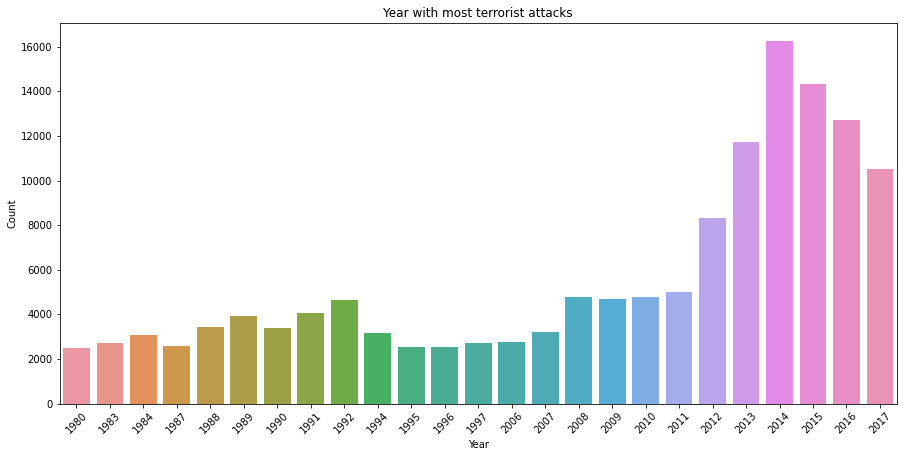

In [ ]:
#Year with most terrorist attacks

plt.figure(figsize = (15,7))
sns.barplot(data['Year'].value_counts()[:25].index, data['Year'].value_counts()[:25].values)
plt.title('Year with most terrorist attacks')
plt.xlabel('Year')
plt.ylabel('Count')
plt.xticks(rotation = 45)
plt.show()

* In year 2014, most attacks was happend, but we can also see after that attacks are decreasing in upcoming years.
* In recent decades attacks has been increased so much.

#### Analysis on feature Month

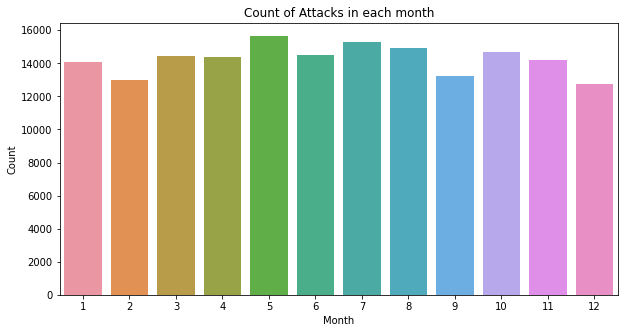

In [ ]:
#Distribution of attack in each month

plt.figure(figsize = (10,5))
sns.barplot(data['Month'].value_counts()[:12].index, data['Month'].value_counts()[:12].values)
plt.title('Count of Attacks in each month')
plt.xlabel('Month')
plt.ylabel('Count')
plt.show()

* Attacks are happend randomly, so month feature not gives much information.

#### Analysis on feature Day

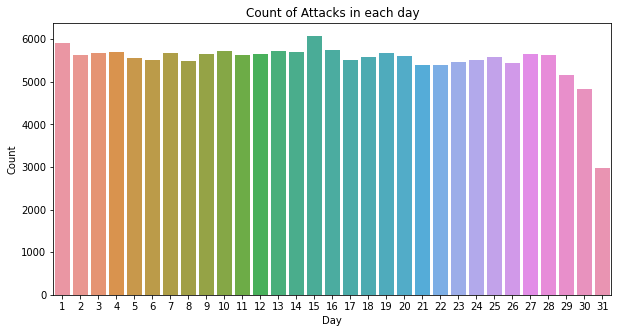

In [ ]:
#Distribution of attack in each month

plt.figure(figsize = (10,5))
sns.barplot(data['Day'].value_counts()[:31].index, data['Day'].value_counts()[:31].values)
plt.title('Count of Attacks in each day')
plt.xlabel('Day')
plt.ylabel('Count')
plt.show()

* Attacks are happend randomly, so day feature not gives much information but mostly on last day of month there are less attacks.

#### Analysis on feature Extended

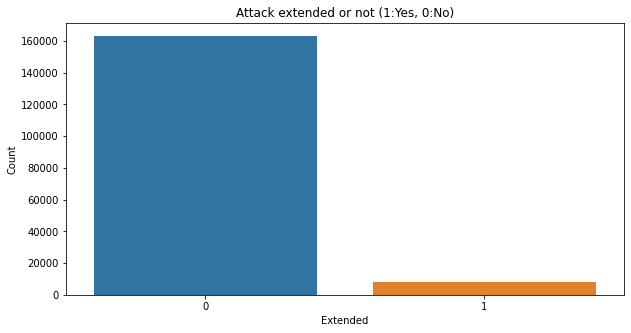

In [ ]:
plt.figure(figsize = (10,5))
sns.barplot(data['Extended'].value_counts().index, data['Extended'].value_counts().values)
plt.title('Attack extended or not (1:Yes, 0:No)')
plt.xlabel('Extended')
plt.ylabel('Count')
plt.show()

* Most of the attacks didn't got extended but still some attacks extended and caused much more problems.

#### Analysis on feature Country

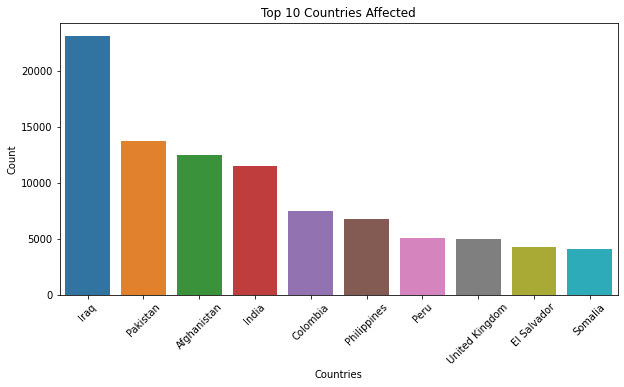

In [ ]:
plt.figure(figsize = (10,5))
sns.barplot(data['Country'].value_counts()[:10].index, data['Country'].value_counts()[:10].values)
plt.title('Top 10 Countries Affected')
plt.xlabel('Countries')
plt.ylabel('Count')
plt.xticks(rotation = 45)
plt.show()

* Countries like Iraq, Pakistan, Afghanistan, India, Colombia faces most number of terrorist attacks. 

#### Analysis on feature State

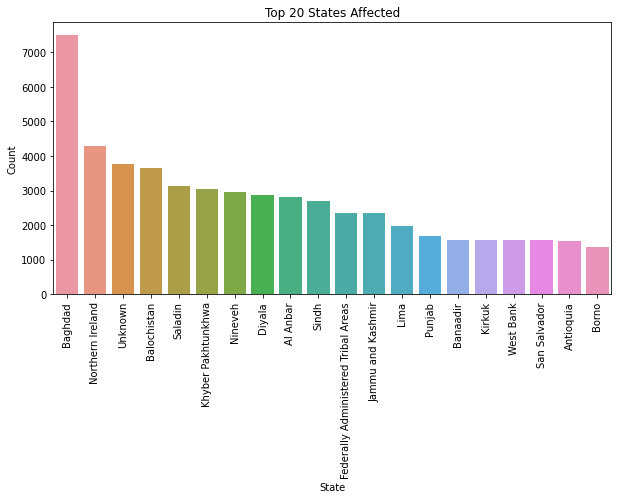

In [ ]:
plt.figure(figsize = (10,5))
sns.barplot(data['State'].value_counts()[:20].index, data['State'].value_counts()[:20].values)
plt.title('Top 20 States Affected')
plt.xlabel('State')
plt.ylabel('Count')
plt.xticks(rotation = 90)
plt.show()

* Bangdad state faces most number of terrorist attacks. 

#### Analysis on feature City

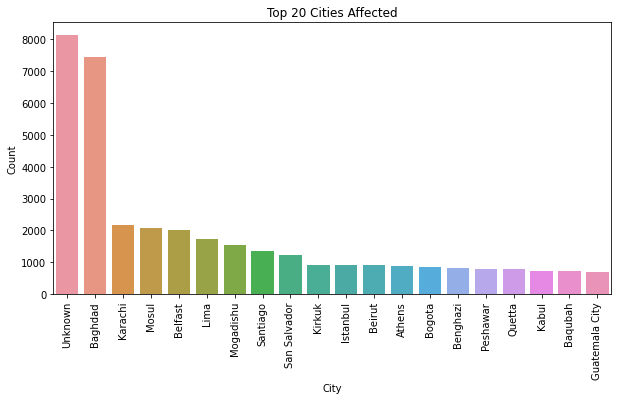

In [ ]:
plt.figure(figsize = (10,5))
sns.barplot(data['City'].value_counts()[:20].index, data['City'].value_counts()[:20].values)
plt.title('Top 20 Cities Affected')
plt.xlabel('City')
plt.ylabel('Count')
plt.xticks(rotation = 90)
plt.show()

#### Analysis on feature Region

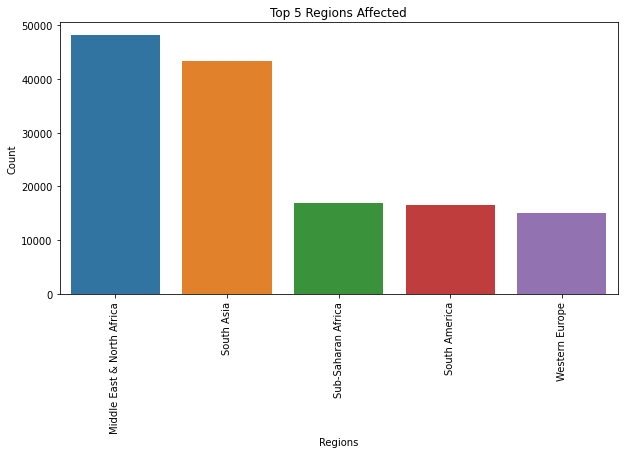

In [ ]:
plt.figure(figsize = (10,5))
sns.barplot(data['Region'].value_counts()[:5].index, data['Region'].value_counts()[:5].values)
plt.title('Top 5 Regions Affected')
plt.xlabel('Regions')
plt.ylabel('Count')
plt.xticks(rotation = 90)
plt.show()

* Most number of attacks are occuring in Middle East & North Africa and South Asia region.

#### Analysis on feature AttackType

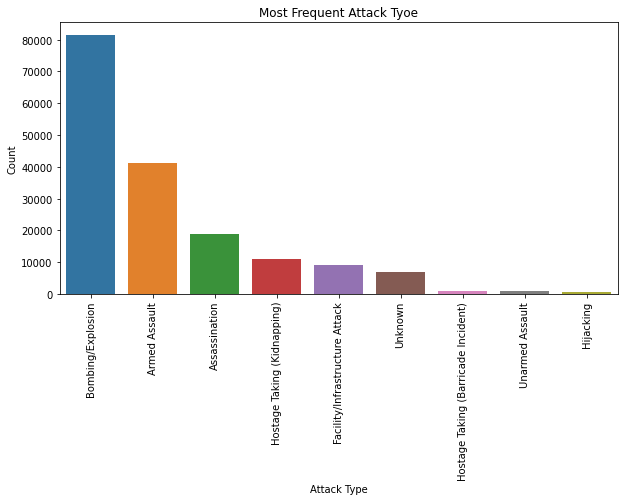

In [ ]:
plt.figure(figsize = (10,5))
sns.barplot(data['AttackType'].value_counts()[:10].index, data['AttackType'].value_counts()[:10].values)
plt.title('Most Frequent Attack Tyoe')
plt.xlabel('Attack Type')
plt.ylabel('Count')
plt.xticks(rotation = 90)
plt.show()

* Bombing/Explosion is the most used attack type by terrorist.

#### Analysis on feature Year and Killed

Text(0.5, 1.0, 'Year Wise killing by terror attack')

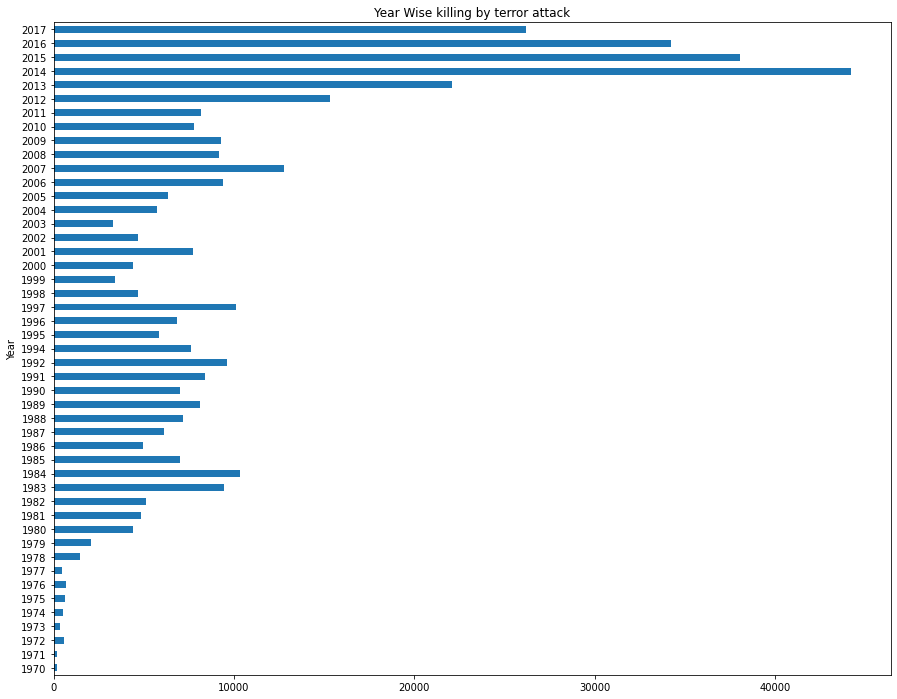

In [ ]:
plt.figure(figsize=(15,12))
yearwise_killed = data.groupby(['Year'])['Killed'].sum()
yearwise_killed.plot.barh() # h for horizontal bar plot
plt.title('Year Wise killing by terror attack')

* Most killing are happend in recent years only whereas in 2014 has highest number of killing.

#### Analysis on feature Year and Wounded

Text(0.5, 1.0, 'Year Wise injuring by terror attack')

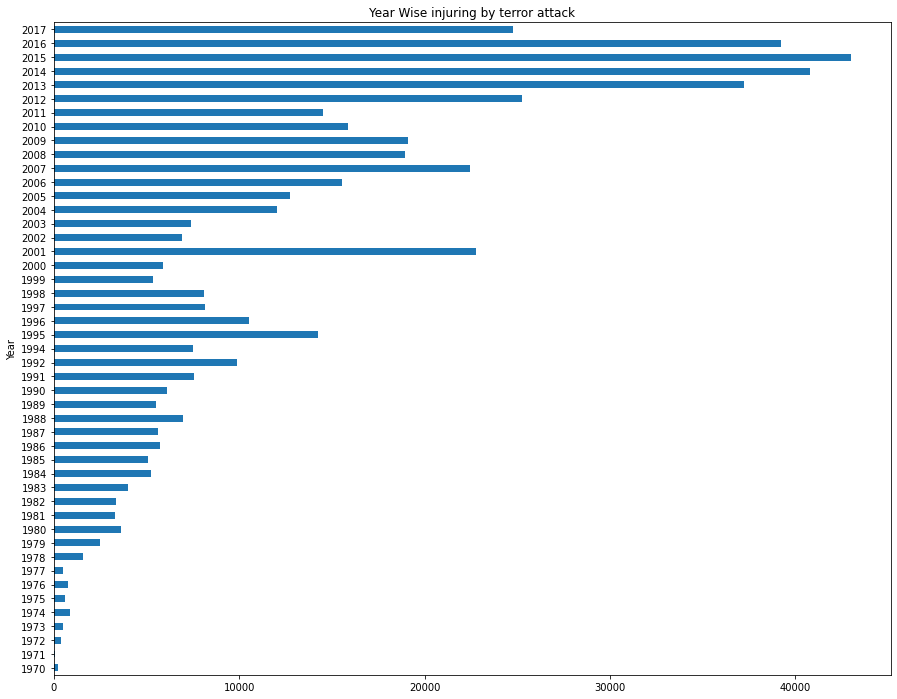

In [ ]:
plt.figure(figsize=(15,12))
yearwise_wounded = data.groupby(['Year'])['Wounded'].sum()
yearwise_wounded.plot.barh() # h for horizontal bar plot
plt.title('Year Wise injuring by terror attack')

* Most injuring are happend in recent years only whereas in 2015 has highest number of injuring.

#### Analysis on feature Country and Killed

Text(0.5, 1.0, 'Country wise killing')

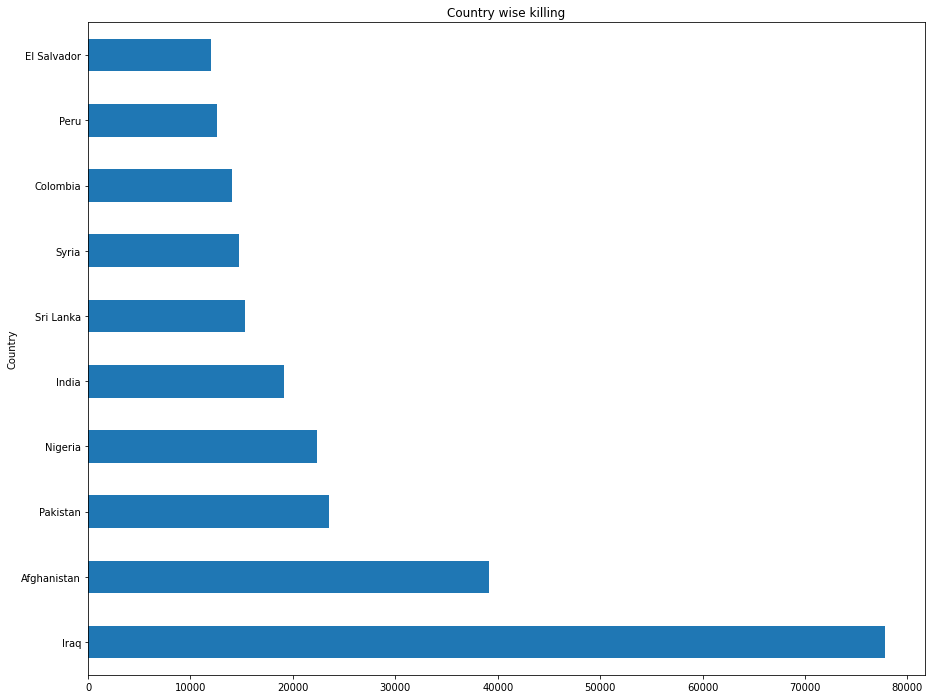

In [ ]:
plt.figure(figsize=(15,12))
countrywise_killed = data.groupby(['Country'])['Killed'].sum().nlargest(10)
countrywise_killed.plot.barh() # h for horizontal bar plot
plt.title('Country wise killing')

* In Country Iraq, Afghanistan, Pakistan most people were killed due to terrorism.

#### Analysis on feature Country and Wounded

Text(0.5, 1.0, 'Country wise injuring')

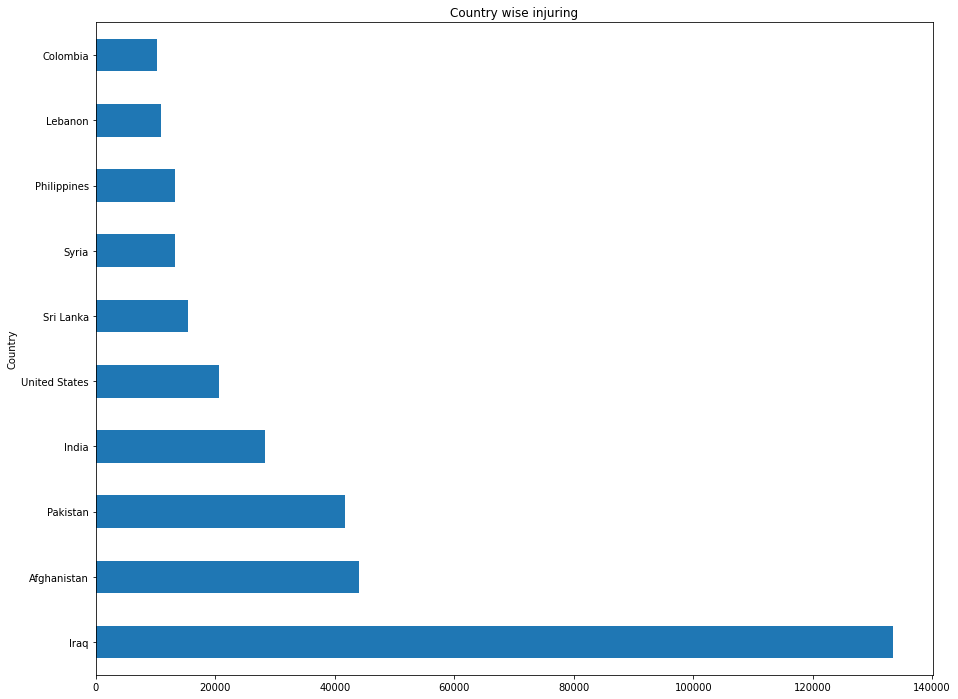

In [ ]:
plt.figure(figsize=(15,12))
countrywise_wounded = data.groupby(['Country'])['Wounded'].sum().nlargest(10)
countrywise_wounded.plot.barh() # h for horizontal bar plot
plt.title('Country wise injuring')

* In Country Iraq, Afghanistan, Pakistan most people were injured due to terrorism.

#### Analysis on feature Success

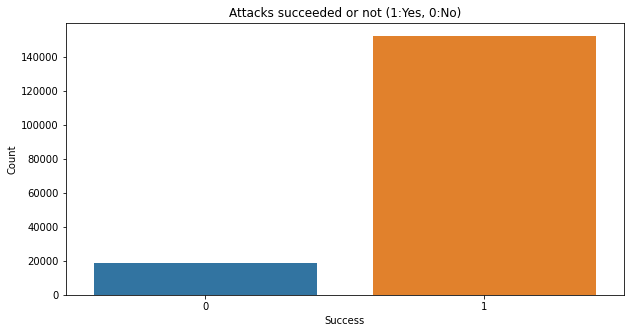

In [ ]:
plt.figure(figsize = (10,5))
sns.barplot(data['Success'].value_counts().index, data['Success'].value_counts().values)
plt.title('Attacks succeeded or not (1:Yes, 0:No)')
plt.xlabel('Success')
plt.ylabel('Count')
plt.show()

* We can observe that most of the terrorist attack were successful which means we failed to avoid or lower the impact of terrorism in most cases.

#### Analysis on feature Suicide

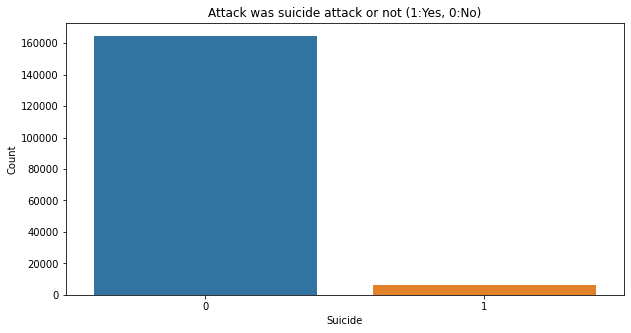

In [ ]:
plt.figure(figsize = (10,5))
sns.barplot(data['Suicide'].value_counts().index, data['Suicide'].value_counts().values)
plt.title('Attack was suicide attack or not (1:Yes, 0:No)')
plt.xlabel('Suicide')
plt.ylabel('Count')
plt.show()

* Very few attacks were suicide attacks.

#### Analysis on feature Group

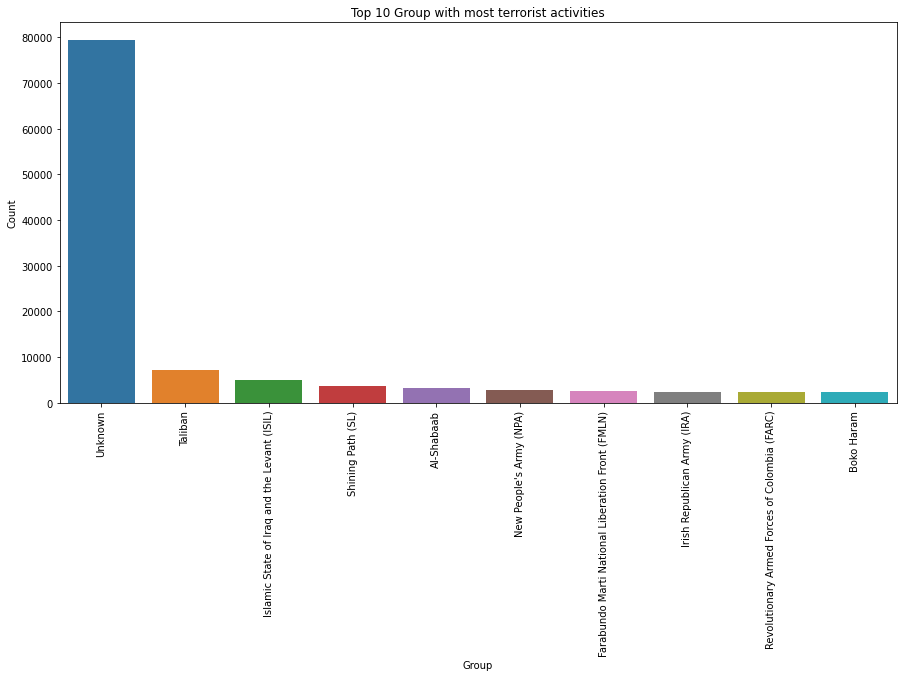

In [ ]:
plt.figure(figsize = (15,7))
sns.barplot(data['Group'].value_counts()[:10].index, data['Group'].value_counts()[:10].values)
plt.title('Top 10 Group with most terrorist activities')
plt.xlabel('Group')
plt.ylabel('Count')
plt.xticks(rotation = 90)
plt.show()

* We can observe that still around 80k attacking groups are unknown whereas Taliban and Islamic State of iraq and the Levant(ISIL) is most active ans responsible group for most of the terrosrism activities.

#### Analysis on feature Target_type

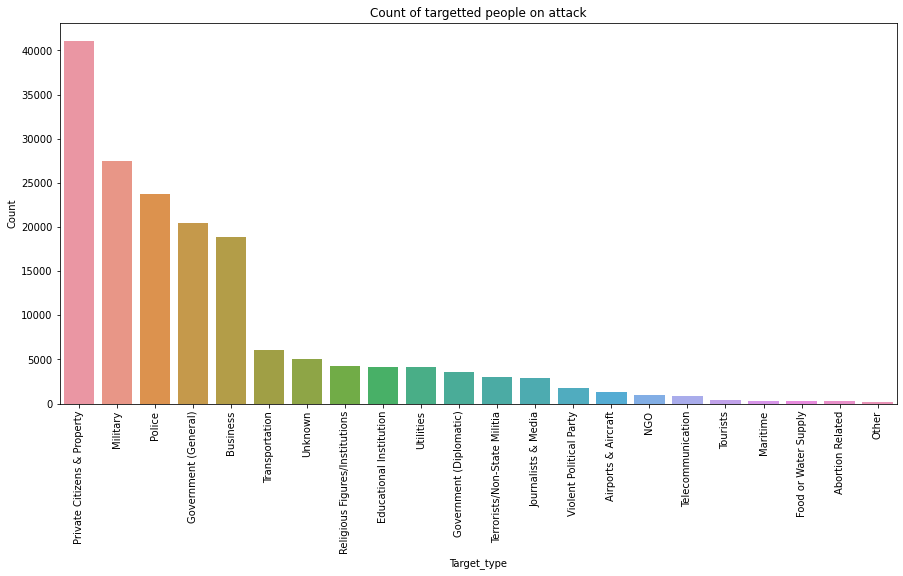

In [ ]:
plt.figure(figsize = (15,7))
sns.barplot(data['Target_type'].value_counts().index, data['Target_type'].value_counts().values)
plt.title('Count of targetted people on attack')
plt.xlabel('Target_type')
plt.ylabel('Count')
plt.xticks(rotation = 90)
plt.show()

* Most of the time targetted people are private citizens, properties, military and police.

#### Analysis on feature Weapon_type

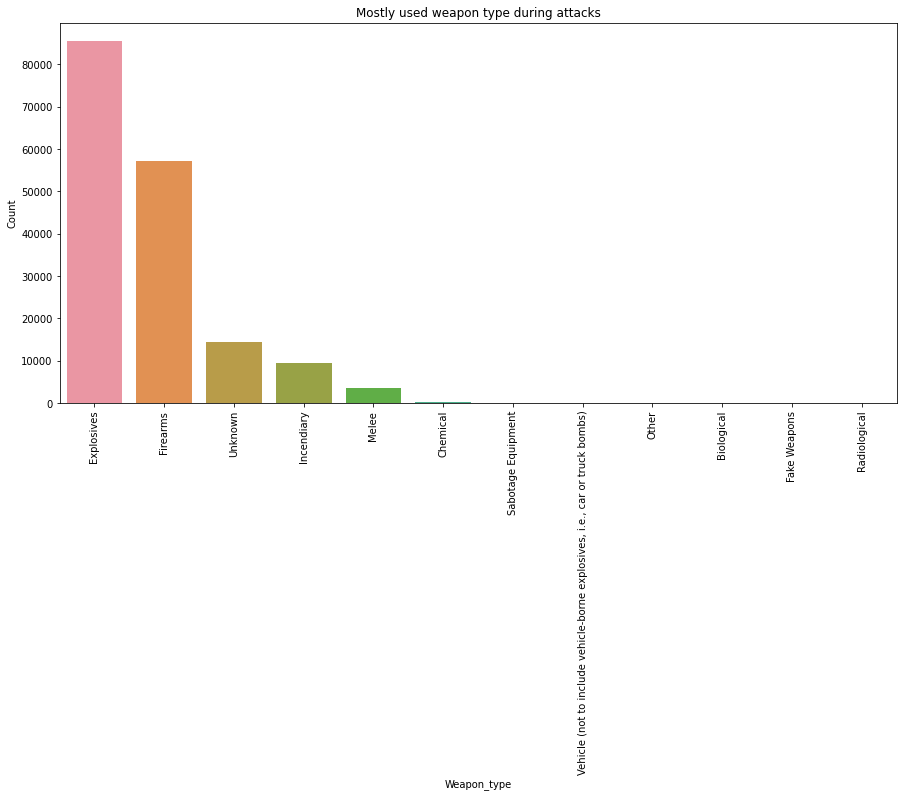

In [ ]:
plt.figure(figsize = (15,7))
sns.barplot(data['Weapon_type'].value_counts().index, data['Weapon_type'].value_counts().values)
plt.title('Mostly used weapon type during attacks')
plt.xlabel('Weapon_type')
plt.ylabel('Count')
plt.xticks(rotation = 90)
plt.show()

* Explosive and Firearms weapons are mostly used to do terror activites.

#### Analysis on feature Year and Killed

#### Analysis on feature Year and Killed/Wounded

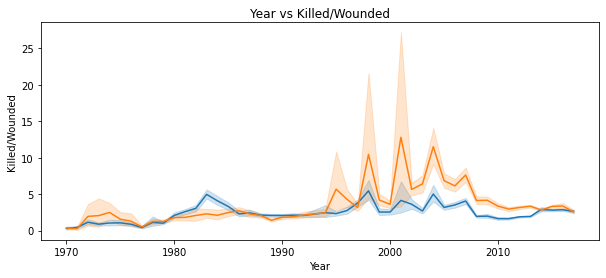

In [ ]:
plt.figure(figsize = (10,4))
sns.lineplot('Year', 'Killed', data = data)
sns.lineplot('Year', 'Wounded', data = data)
plt.ylabel('Killed/Wounded')
plt.title('Year vs Killed/Wounded')
plt.show()

* We can see in mid of 1980's decade killing were more than injuring whereas in early 2000 to end of the decade injuting is much more than killing.

### 5. Conclusion

* In year 2014, most attacks was happend, but we can also see after that attacks are decreasing in upcoming years.

* Countries like Iraq, Pakistan, Afghanistan, India, Colombia faces most number of terrorist attacks, killing and injuring.

* Bangdad state faces most number of terrorist attacks.

* Most number of attacks are occuring in Middle East & North Africa and South Asia region.

* Bombing/Explosion is the most used attack type by terrorist.

* Most killing are happend in recent years only whereas in 2014 has highest number of killing.

* Most injuring are happend in recent years only whereas in 2015 has highest number of injuring.

* Most of the terrorist attack were successful which means we failed to avoid or lower the impact of terrorism in most cases.

* Around 80k attacking groups are unknown whereas Taliban and Islamic State of iraq and the Levant(ISIL) is most active ans responsible group for most of the terrosrism activities.

* Most of the time targetted people are private citizens, properties, military and police.

* Explosive and Firearms weapons are mostly used to do terror activites.

* In mid of 1980's decade killing were more than injuring whereas in early 2000 to end of the decade injuting is much more than killing.

#### 5.1 Hot Zone

1. Most affected countries due to terrorism are Iraq, Afganistan and Pakistan.
2. In year 2014 most number of people were killed because of terrorism whereas in year 2015 most people were injured.
3. Bangdad and Karachi city faces most number of terrorist attacks.
4. Most number of attacks are occuring in Middle East & North Africa and South Asia region.

#### 5.2 Issues & Insight

1. Bombing/Explosion is the most used attack type by terrorist. This can be avoided by increasing the security to track illegal import and export of exposive items.
2. Most number of attacks are occuring in Middle East & North Africa and South Asia region. So to avoid this countries in these regions not only need to control the terror in there jurisdiction but also needs to improve the security of border to avoid illegal migrant entering or leaving from one to another country.
3. Around 80k attacking groups are unknown, so tracking the root of their group will definitely help to stop terrosrism.
4. Most of the time targetted people are citizens, properties, military and polices. So, better awareness and security in public places like mall, markets will help to avoid terrorism.